In [1]:
!pip install git+https://github.com/StochasticTree/stochtree.git

  Cloning https://github.com/StochasticTree/stochtree.git to /tmp/pip-req-build-21n8_uy2
  Running command git clone --filter=blob:none --quiet https://github.com/StochasticTree/stochtree.git /tmp/pip-req-build-21n8_uy2
  Resolved https://github.com/StochasticTree/stochtree.git to commit f55bbb47b57ef6160964084650ab81f557c9559c
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for stochtree: filename=stochtree-0.1.0-cp311-cp311-linux_x86_64.whl size=871294 sha256=a6a3b46fd56a36bc3adfc6b1b1bddd7b203d2eb9da144da88d7c9aaf1cd748e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-0fn0mjl8/wheels/6b/16/bb/b09e1d07fb9c44bfd19200620859a0fdda75287afaa4a076bf
Successfully built stochtree


In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from stochtree import BCFModel
from tqdm import tqdm  # Import tqdm for the progress bar

In [4]:
data_linear=pd.read_csv("mpdta.csv")
data_linear.head()

,year,countyreal,lpop,lemp,first.treat,treat
0,2003,8001,5.896761,8.461469,2007,1
1,2004,8001,5.896761,8.336870,2007,1
2,2005,8001,5.896761,8.340217,2007,1
3,2006,8001,5.896761,8.378161,2007,1
4,2007,8001,5.896761,8.487352,2007,1


In [7]:
data_linear['D'] = data_linear['treat'] * (data_linear['first.treat'] <= data_linear['year']).astype(int)
data_linear.head(50)

,year,countyreal,lpop,lemp,first.treat,treat,D
0,2003,8001,5.896761,8.461469,2007,1,0
1,2004,8001,5.896761,8.336870,2007,1,0
2,2005,8001,5.896761,8.340217,2007,1,0
3,2006,8001,5.896761,8.378161,2007,1,0
4,2007,8001,5.896761,8.487352,2007,1,1
5,2003,8019,2.232377,4.997212,2007,1,0
6,2004,8019,2.232377,5.081404,2007,1,0
7,2005,8019,2.232377,4.787492,2007,1,0
8,2006,8019,2.232377,4.990433,2007,1,0
9,2007,8019,2.232377,5.036953,2007,1,1


In [8]:
data_linear.tail(50)

,year,countyreal,lpop,lemp,first.treat,treat,D
2450,2003,55051,1.925853,4.762174,2006,1,0
2451,2004,55051,1.925853,4.700480,2006,1,0
2452,2005,55051,1.925853,4.644391,2006,1,0
2453,2006,55051,1.925853,4.634729,2006,1,1
2454,2007,55051,1.925853,4.418841,2006,1,1
2455,2003,55059,5.007811,8.002360,2006,1,0
2456,2004,55059,5.007811,7.916443,2006,1,0
2457,2005,55059,5.007811,7.950502,2006,1,0
2458,2006,55059,5.007811,7.920810,2006,1,1
2459,2007,55059,5.007811,7.912057,2006,1,1


In [9]:
data_linear.columns

Index(['year', 'countyreal', 'lpop', 'lemp', 'first.treat', 'treat', 'D'], dtype='object')

In [10]:
num_mcmc=500

X = np.array(data_linear[["treat"] + ["lpop"] +["year"]+["first.treat"]])
Z=np.array(data_linear["D"])
y=np.array(data_linear["lemp"])
bcf_model = BCFModel()

general_params = {"keep_every": 5, "num_chains": 3}
prognostic_forest_params = {"keep_vars": np.array([0,1,2,3])}
treatment_effect_forest_params = {"keep_vars": np.array([1,2])}
bcf_model.sample(X_train=X, Z_train=Z, y_train=y, num_gfr=50, num_mcmc=num_mcmc, general_params=general_params, prognostic_forest_params=prognostic_forest_params,
                treatment_effect_forest_params=treatment_effect_forest_params)


In [11]:
bcf_model.tau_hat_train.mean(axis=1)[:100]

array([-0.14106797, -0.12953626, -0.13048685, -0.08914373, -0.17527113,
       -0.14383166, -0.1321148 , -0.13304158, -0.09168377, -0.17762477,
       -0.1507409 , -0.13900125, -0.13992246, -0.09856465, -0.1845172 ,
       -0.10638772, -0.09468266, -0.09560944, -0.05425163, -0.14037903,
       -0.1321469 , -0.12061519, -0.12156578, -0.08022266, -0.16635006,
       -0.14351534, -0.13179847, -0.13272526, -0.09136745, -0.17732   ,
       -0.14376671, -0.13206165, -0.13298843, -0.09163062, -0.17775802,
       -0.16970674, -0.15796709, -0.15889387, -0.11753606, -0.20348862,
       -0.14151106, -0.12980599, -0.13073277, -0.08937497, -0.17550237,
       -0.1338342 , -0.12227013, -0.12319692, -0.0818538 , -0.1679812 ,
       -0.14148975, -0.12978469, -0.13071147, -0.08935366, -0.17548106,
       -0.13386644, -0.12230237, -0.12322915, -0.08188603, -0.16801344,
       -0.10930748, -0.09760241, -0.09852919, -0.05717139, -0.14329879,
       -0.14344534, -0.13174028, -0.13266706, -0.09130925, -0.17

In [13]:
data_linear['lpop_group'] = pd.qcut(data_linear['lpop'], q=3, labels=[1, 2, 3])

In [14]:
data_linear.head()

,year,countyreal,lpop,lemp,first.treat,treat,D,lpop_group
0,2003,8001,5.896761,8.461469,2007,1,0,3
1,2004,8001,5.896761,8.336870,2007,1,0,3
2,2005,8001,5.896761,8.340217,2007,1,0,3
3,2006,8001,5.896761,8.378161,2007,1,0,3
4,2007,8001,5.896761,8.487352,2007,1,1,3


In [25]:
CATT_small_population_indexes=data_linear[(data_linear['D']==1)& (data_linear['lpop_group']==1)].index
CATT_medium_population_indexes=data_linear[(data_linear['D']==1)& (data_linear['lpop_group']==2)].index
CATT_high_population_indexes=data_linear[(data_linear['D']==1)& (data_linear['lpop_group']==3)].index

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

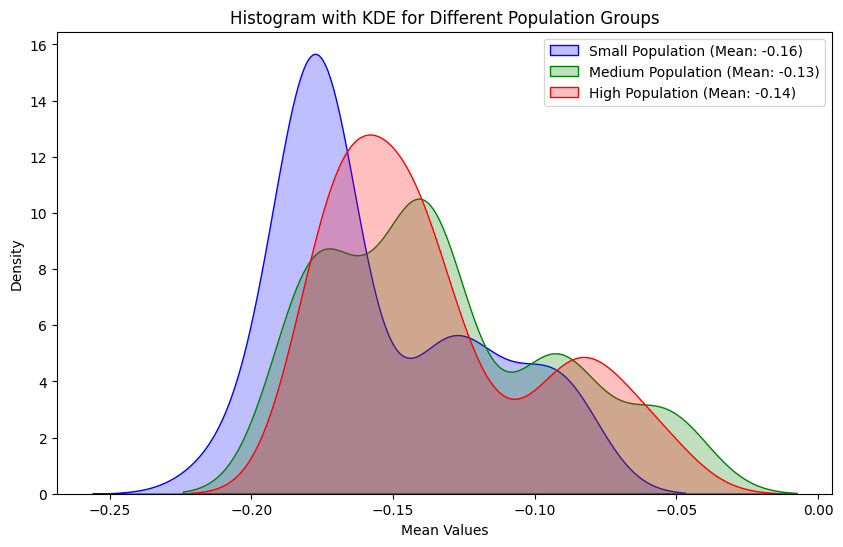

In [30]:
# Extract the mean values for each group
small_population = np.exp(bcf_model.tau_hat_train.mean(axis=1)[CATT_small_population_indexes])-1
medium_population = np.exp(bcf_model.tau_hat_train.mean(axis=1)[CATT_medium_population_indexes])-1
high_population = np.exp(bcf_model.tau_hat_train.mean(axis=1)[CATT_high_population_indexes])-1

# Calculate the mean of each group
mean_small = np.mean(small_population)
mean_medium = np.mean(medium_population)
mean_high = np.mean(high_population)

# Plot the histograms with KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(small_population, label=f'Small Population (Mean: {mean_small:.2f})', color='blue', fill=True)
sns.kdeplot(medium_population, label=f'Medium Population (Mean: {mean_medium:.2f})', color='green', fill=True)
sns.kdeplot(high_population, label=f'High Population (Mean: {mean_high:.2f})', color='red', fill=True)

plt.title('Histogram with KDE for Different Population Groups')
plt.xlabel('Mean Values')
plt.ylabel('Density')
plt.legend()
plt.show()

-0.143 or $-14.33\%$